In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from run_evolution import folder_evol
from analytical_results import fT00, fT01, fT11, fj0, fj1, fnu, fLn
from ploting import plot_heatmaps

In [20]:
g = 1 / 2
v, Q = 1, 1
D0, D, tol, method = 64, 64, 1e-6, '12site'
#
mg = [0, 0.1, 0.2, 0.318309886, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ms = [g * x for x in mg]
Nas =  [(512, 0.125)]
#
data = {}
#
for m in ms:
    for N, a in Nas:
        dt = min(1 / 32, a / 4)
        folder = folder_evol(g, m, a, N, v, Q, D0, dt, D, tol, method)
        data[m, N, a] = np.load(folder / f"results.npy", allow_pickle=True).item()

Total energy in time

In [21]:
# test energy from MPO vs T00
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        mask = data[m, N, a]["time"] > -1  # when some points not calculated yet
        x1 = np.sum(data[m, N, a]["T00"][mask, :], axis=1) * a
        x2 = data[m, N, a]["energy"][mask]
        assert np.max(np.abs((np.abs(1 - x1 / x2) ))) < 1e-8

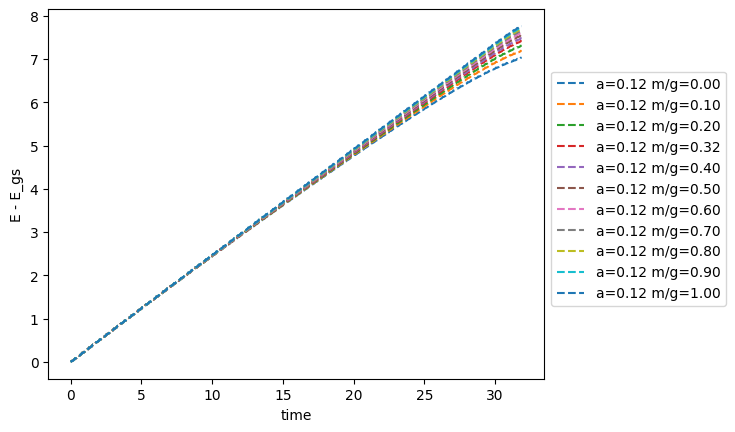

In [22]:
# clrs = dict(zip(ms, cm.tab20))
smbs = {256: ':', 512: '--', 1024: '-'}

for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        tm = data[m, N, a]["time"]
        mask = tm > -1
        tm = tm[mask]
        en = data[m, N, a]["energy"][mask]

        plt.plot(tm[:-4], en[:-4] - en[0], smbs[N], label=f"{a=:0.2f} {m/g=:0.2f}")

plt.xlabel('time')
plt.ylabel('E - E_gs')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

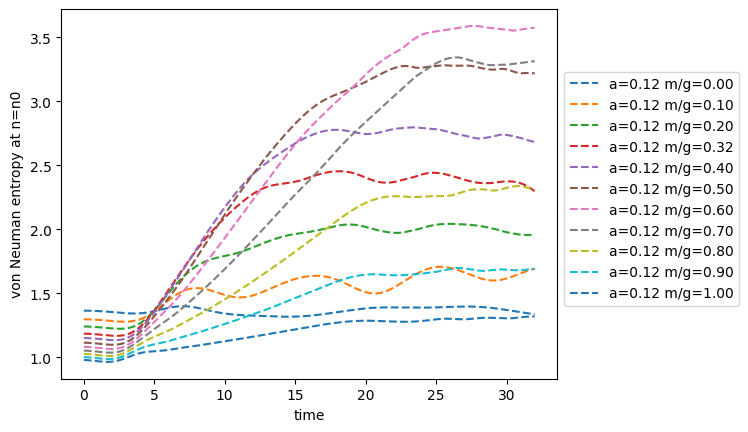

In [23]:
for i, m in enumerate(ms):
    for j, (N, a) in enumerate(Nas):
        tm = data[m, N, a]["time"]
        mask = tm > -1
        tm = tm[mask]

        ee = data[m, N, a]["entropy_1"][mask]
        # ee = ee - ee[0]

        plt.plot(tm, ee[:, N // 2], smbs[N], label=f"{a=:0.2f} {m/g=:0.2f}")
plt.xlabel('time')
plt.ylabel('von Neuman entropy at n=n0')
plt.legend(ncols=1, bbox_to_anchor=(1, 0.85))

von Neuman entropy between left and right parts of the lattice; We subtract values in the initial state.

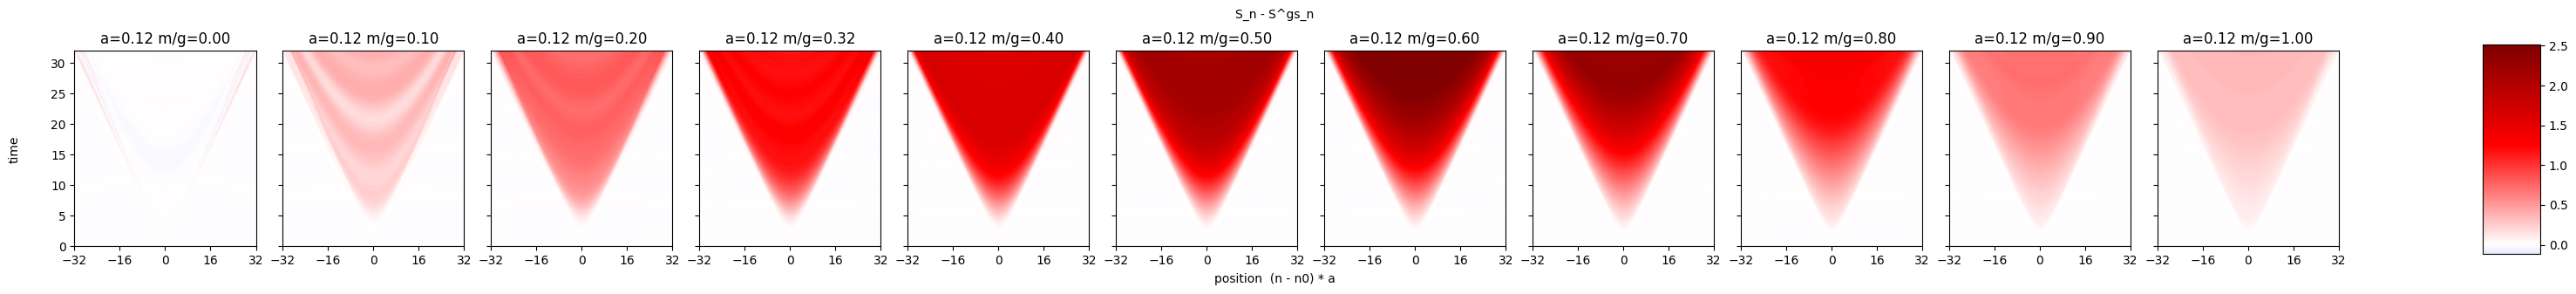

In [24]:
plot_heatmaps('entropy_1', 'S_n - S^gs_n', data, Nas, ms, g, subtract_t0=True, avarage_nn=False)

T00 - T00(t=0);  We might avarage over [2*l, 2*l+1] sites.


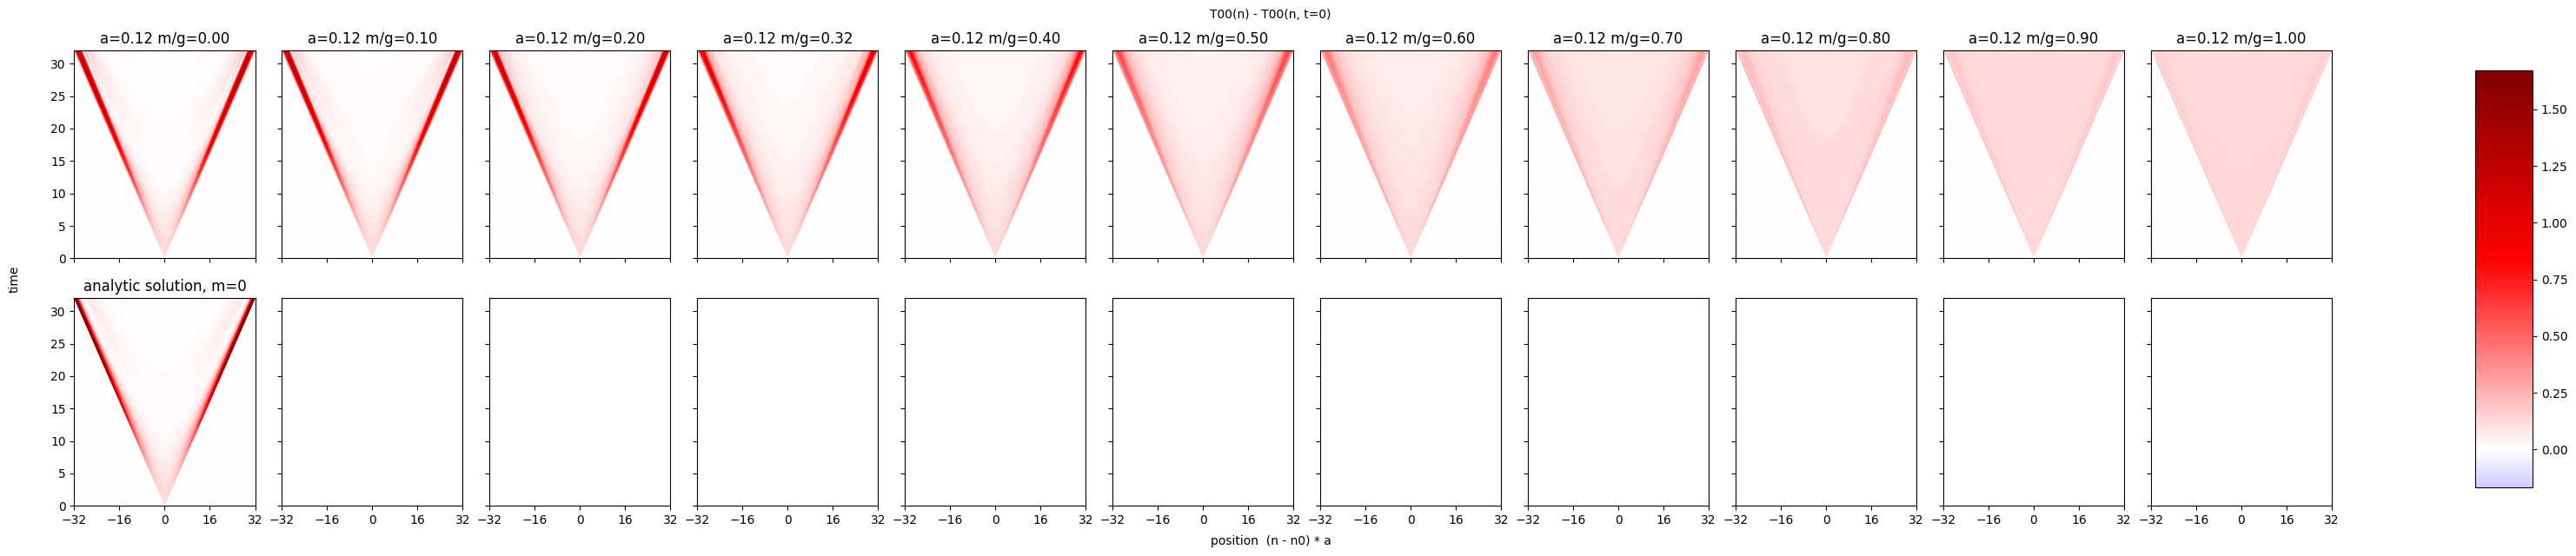

In [25]:
plot_heatmaps("T00", 'T00(n) - T00(n, t=0)', data, Nas, ms, g, fT00, subtract_t0=True, avarage_nn=True)

T11; We avarage over [2*l, 2*l+1] sites, and subtract initial value.

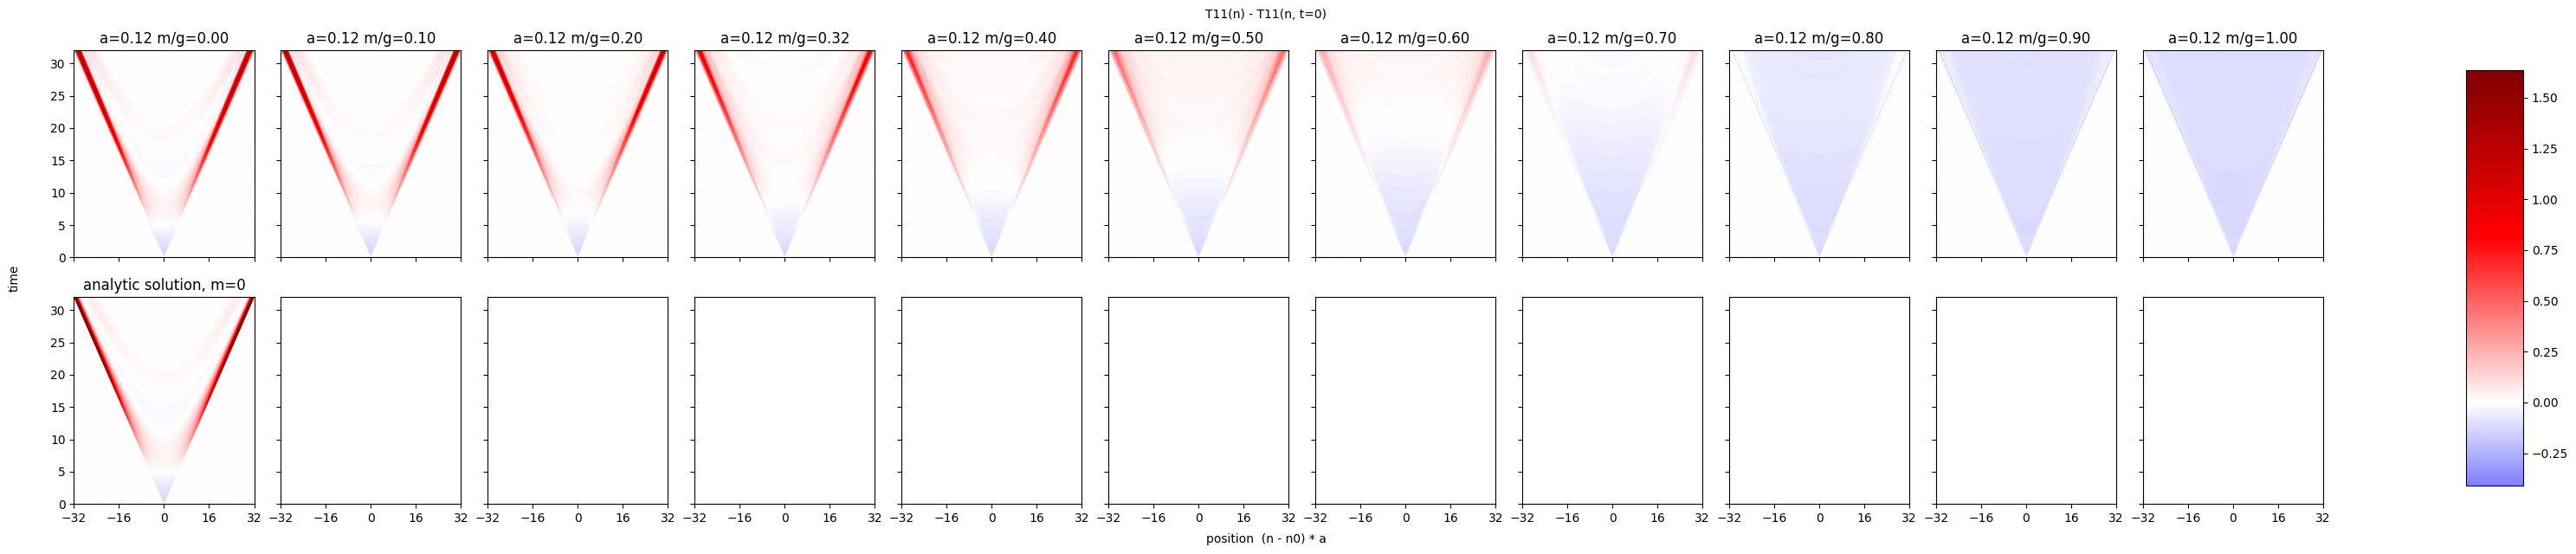

In [26]:
plot_heatmaps("T11", 'T11(n) - T11(n, t=0)', data, Nas, ms, g, fT11, subtract_t0=True, avarage_nn=True)

T01 - T01(t=0); We can avarage over [2*l, 2*l+1] sites.

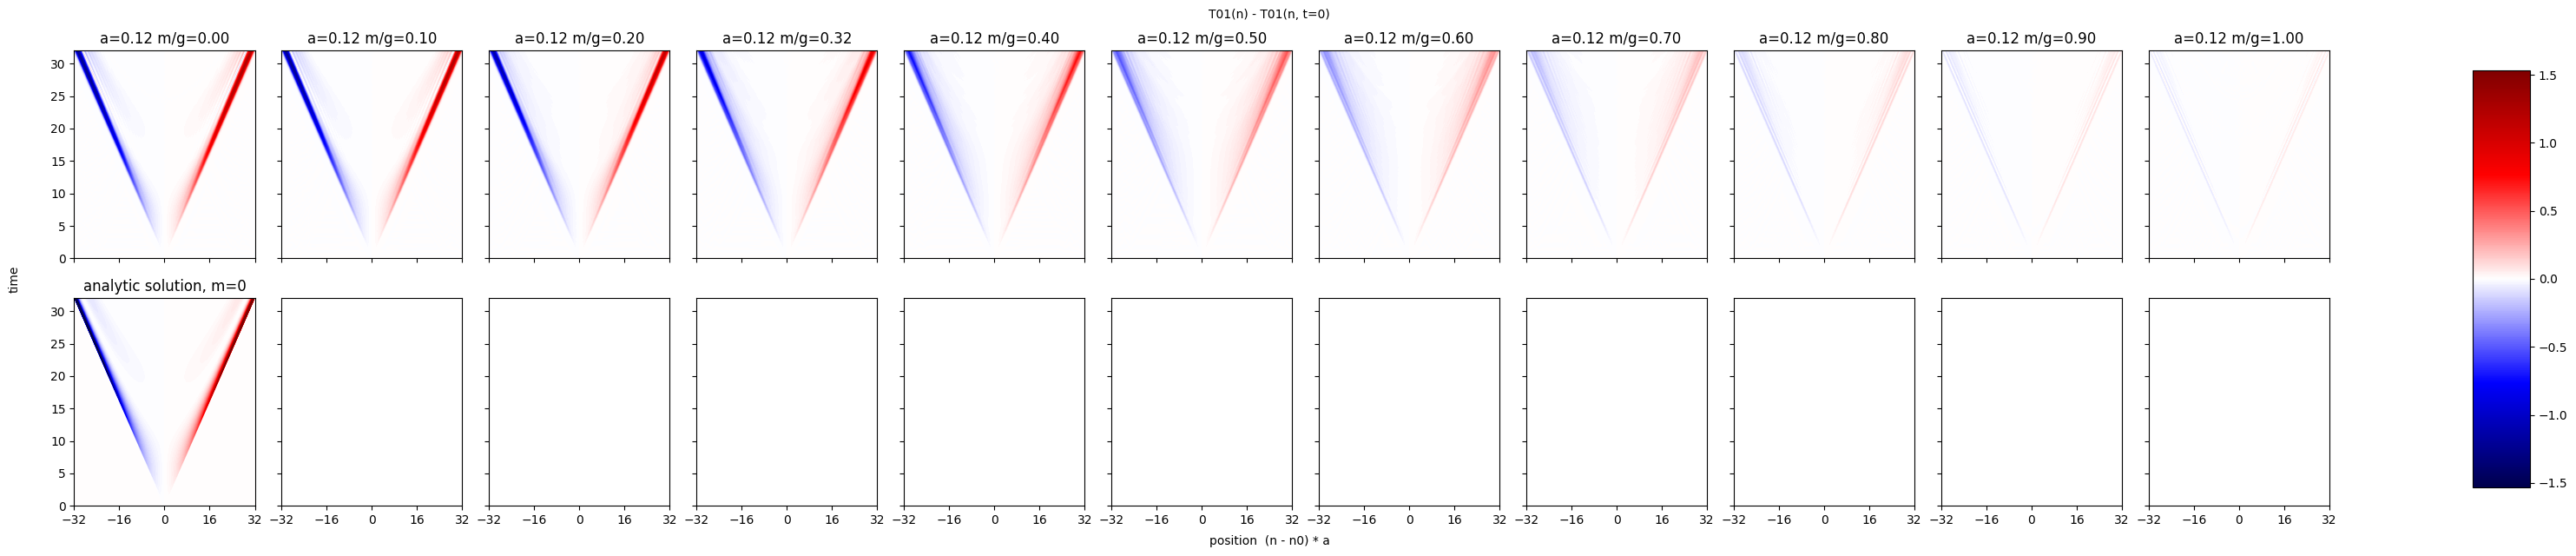

In [27]:
plot_heatmaps("T01", 'T01(n) - T01(n, t=0)', data, Nas, ms, g, fT01, subtract_t0=True, avarage_nn=True)

j0; subtract j0(t=0)

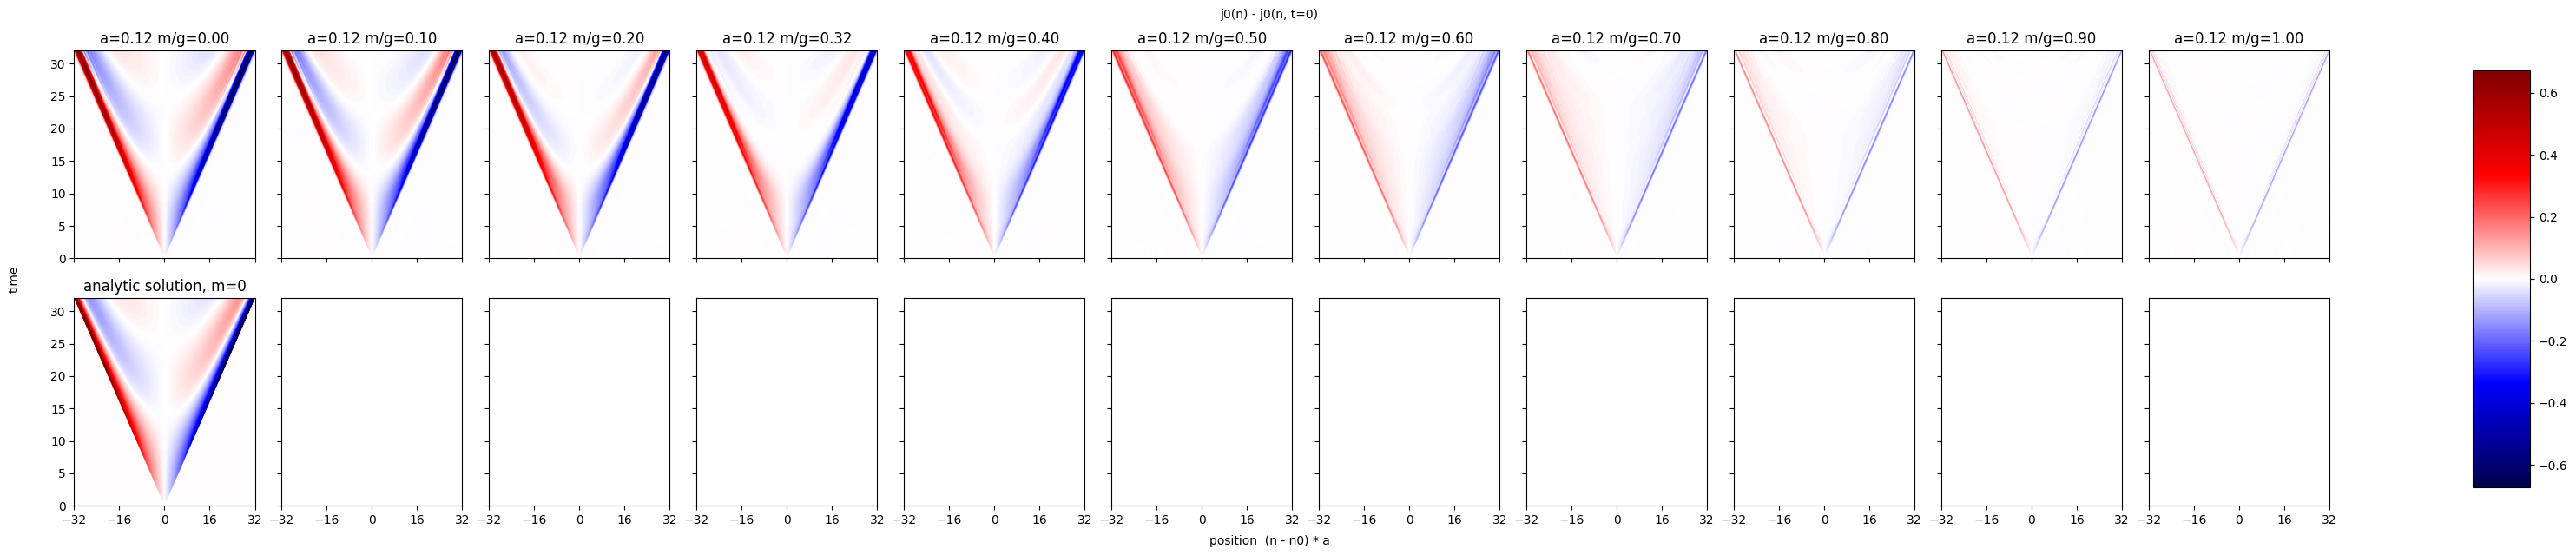

In [28]:
plot_heatmaps("j0", 'j0(n) - j0(n, t=0)', data, Nas, ms, g, fj0, subtract_t0=True, avarage_nn=False)

j1;

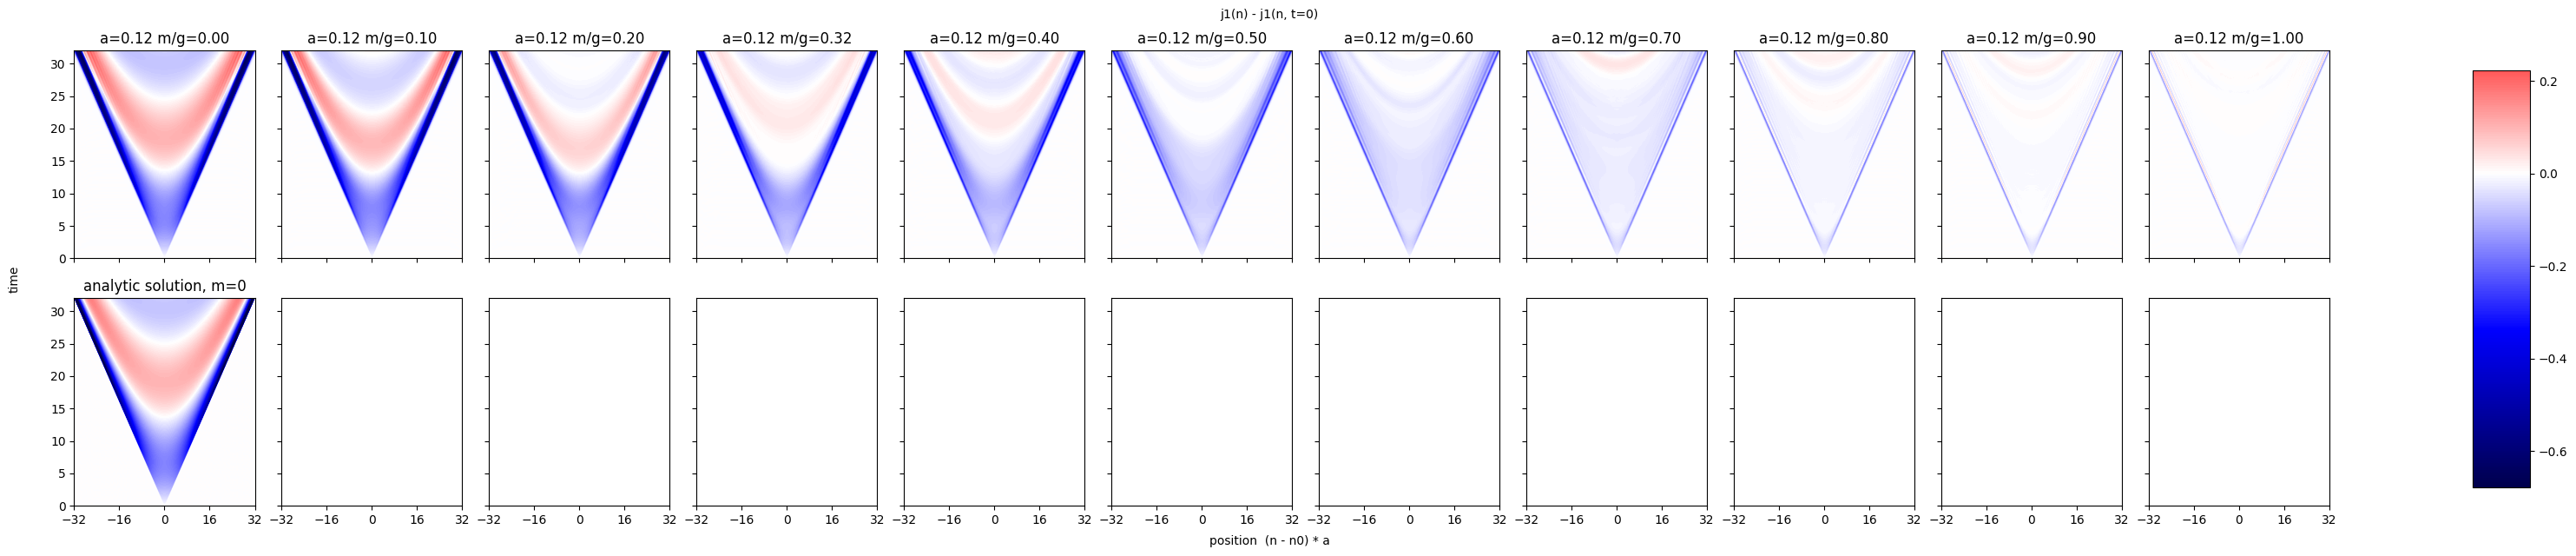

In [29]:
plot_heatmaps("j1", 'j1(n) - j1(n, t=0)', data, Nas, ms, g, fj1, subtract_t0=True, avarage_nn=False)

condensate

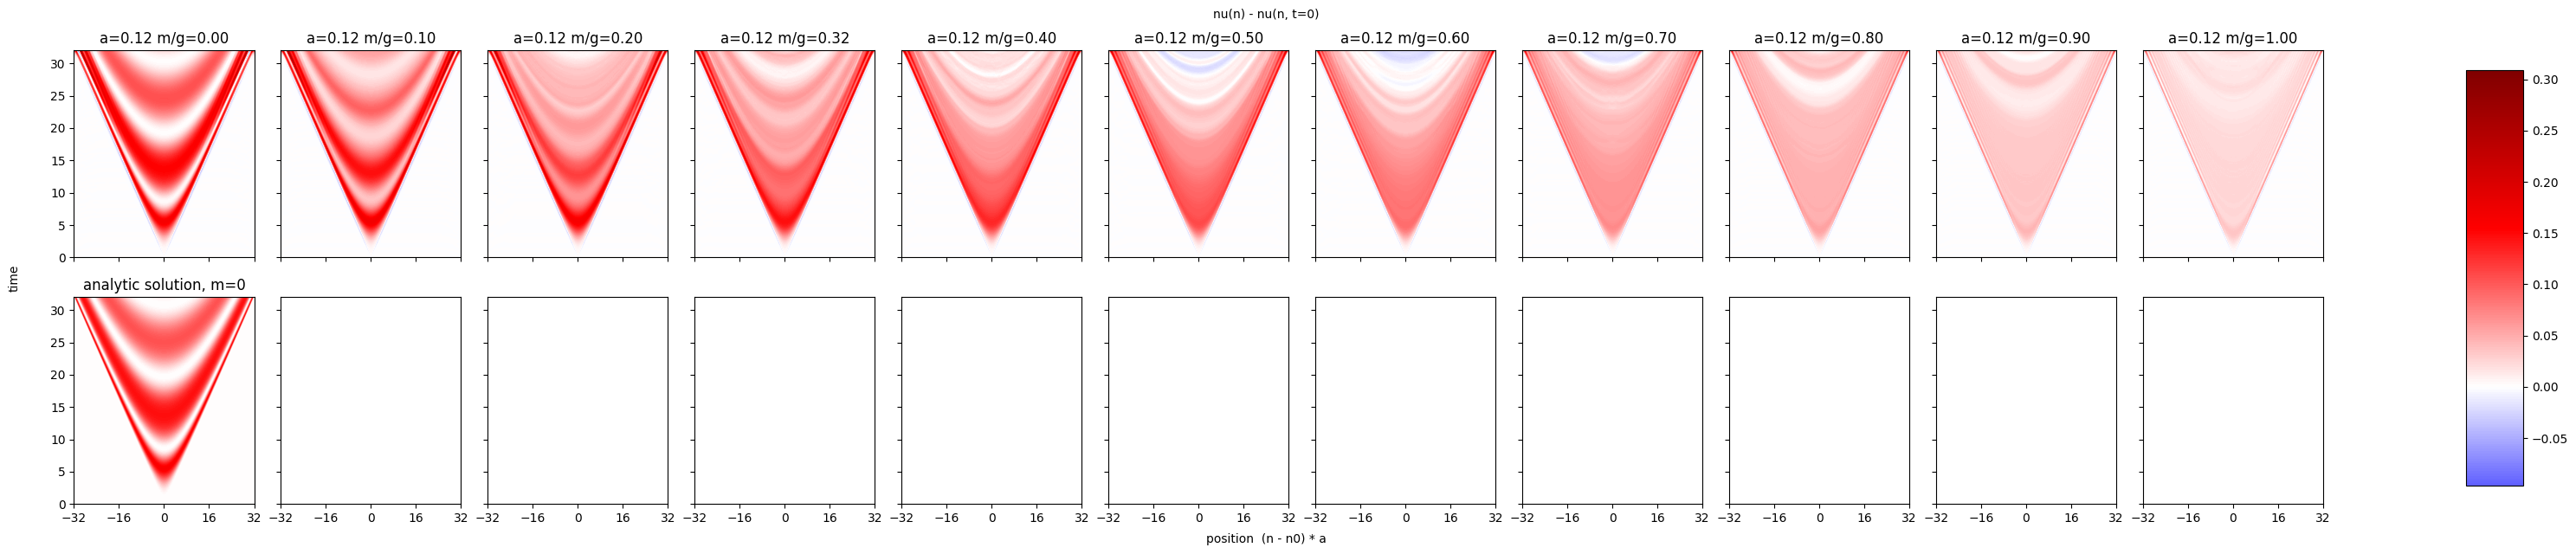

In [30]:
plot_heatmaps("nu", 'nu(n) - nu(n, t=0)', data, Nas, ms, g, fnu, subtract_t0=True, avarage_nn=False)

Ln

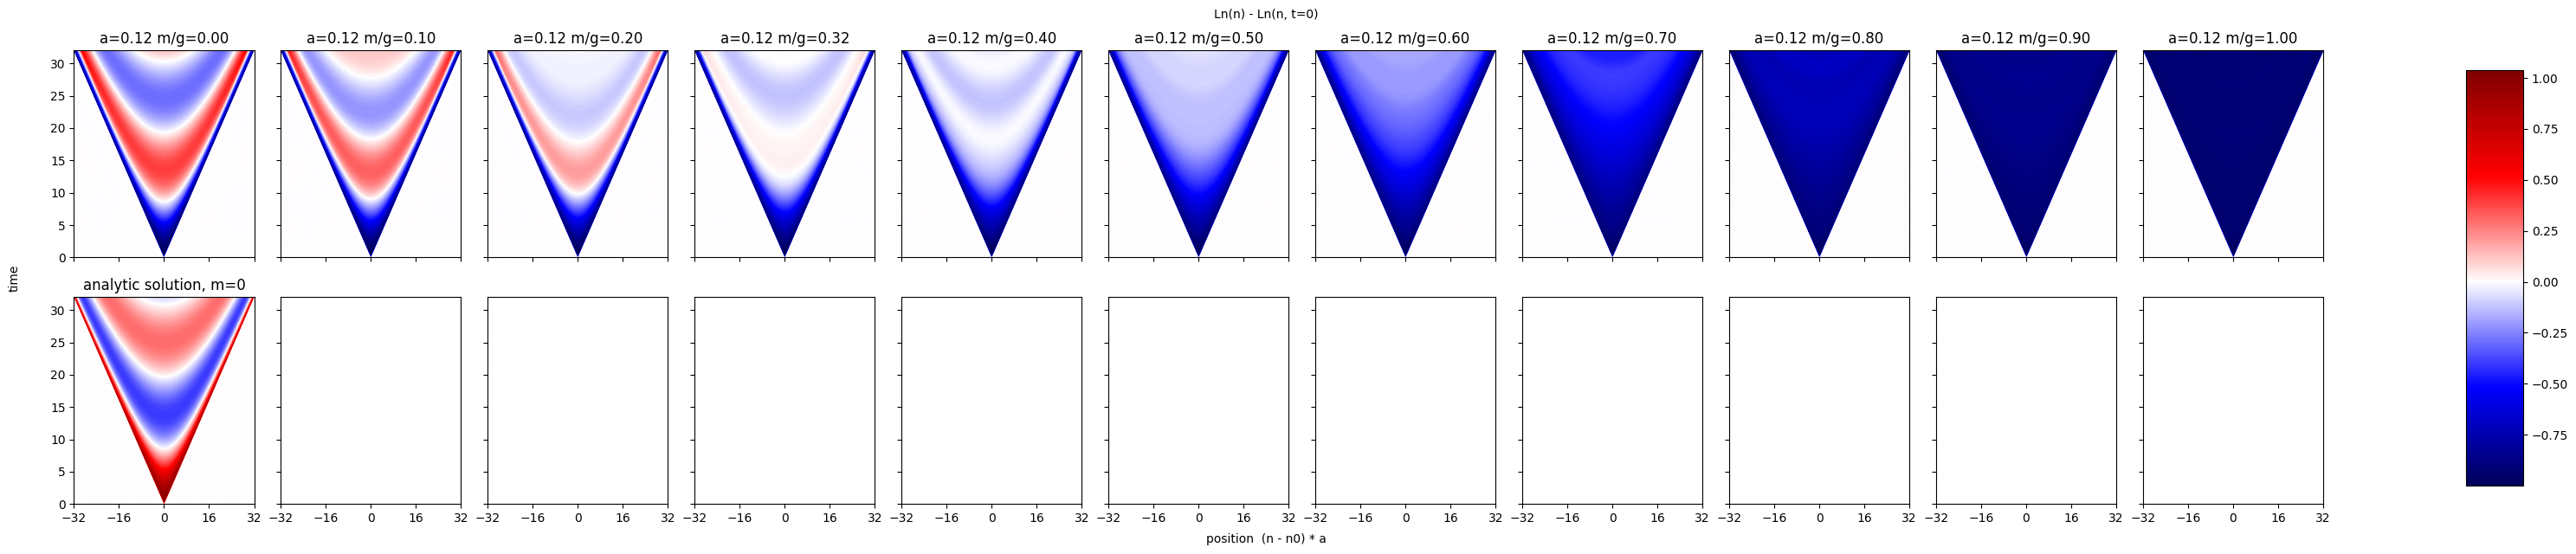

In [31]:
plot_heatmaps("Ln", 'Ln(n) - Ln(n, t=0)', data, Nas, ms, g, fLn, subtract_t0=True, avarage_nn=False)